# 1. Diffusion equation

The [diffusion equation](https://en.wikipedia.org/wiki/Diffusion_equation) reads
$$\frac{\partial c}{\partial t} + \nabla. (-D \nabla c) = 0$$
This equation describe many transport processes, e.g., heat transfer by conduction and mass transfer by diffusion.

## 1.1 Steady-state diffusion equation

Here we solve a diffusion equation on a rectangular domain with fixed value on each boundary:
$$\nabla. (-D \nabla c) = 0$$
Boundary conditions:
$$c(x=0,\; y)=1.0$$
$$c(x=L_x,\; y)=3.0$$
$$c(x,\; y=0)=2.0$$
$$c(x,\; y=L_y)=4.0$$

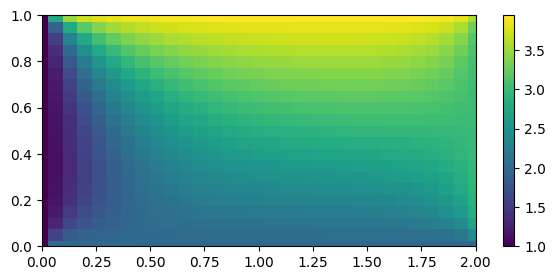

PyObject <matplotlib.colorbar.Colorbar object at 0x7f1cf464a890>

In [8]:
using JFVM

# domain
Lx = 2.0
Ly = 1.0
Nx = 30
Ny = 20
c_left   = 1.0
c_right  = 3.0
c_bottom = 2.0
c_top    = 4.0
m  = createMesh2D(Nx, Ny, Lx, Ly)

# diffusion coefficient
D_val  = 1e-5 # [m^2/s]
D_cell = createCellVariable(m, D_val)
D_face = harmonicMean(D_cell)
M_diff = diffusionTerm(D_face)

# Boundary conditions
BC             = createBC(m)
BC.left.a[:]   = 0.0
BC.left.b[:]   = 1.0
BC.left.c[:]   = c_left
BC.right.a[:]  = 0.0
BC.right.b[:]  = 1.0
BC.right.c[:]  = c_right
BC.bottom.a[:] = 0.0
BC.bottom.b[:] = 1.0
BC.bottom.c[:] = c_bottom
BC.top.a[:]    = 0.0
BC.top.b[:]    = 1.0
BC.top.c[:]    = c_top
M_bc, RHS_bc   = boundaryConditionTerm(BC)

# solve the equation
c = solveLinearPDE(m, -M_diff+M_bc, RHS_bc)
figure(figsize=(7,3))
visualizeCells(c)
colorbar()

## 1.2 Diffusion equation with a constant source term

Let's add a source term right in the middle of the domain (q=1.0 mol/s); do not forget to divide the source term by the volume of the cell. You can derive the equation for yourself (think about the constant source term as a flux to the boundary, right on top of the cell)
$$\nabla. (-D \nabla c) = q$$
Boundary conditions:
$$c(x=0,\; y)=1.0$$
$$c(x=L_x,\; y)=1.0$$
$$c(x,\; y=0)=1.0$$
$$c(x,\; y=L_y)=1.0$$
$$q(x=L_x/2,\; y=L_y/2)=1.0$$

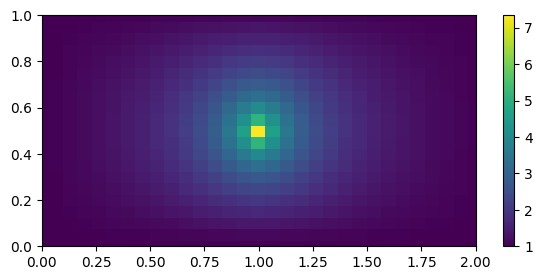

PyObject <matplotlib.colorbar.Colorbar object at 0x7f1cf4814c50>

In [7]:
using JFVM

# domain
Lx = 2.0
Ly = 1.0
Nx = 30
Ny = 20
c_left   = 1.0    # [mol/m^3]
c_right  = 1.0    # [mol/m^3]
c_bottom = 1.0    # [mol/m^3]
c_top    = 1.0    # [mol/m^3]
q        = 1.0e-4 # [mol/s]
m  = createMesh2D(Nx, Ny, Lx, Ly)

# diffusion coefficient
D_val  = 1e-5                          # [m^2/s]
D_cell = createCellVariable(m, D_val)
D_face = harmonicMean(D_cell)
M_diff = diffusionTerm(D_face)

# Boundary conditions
BC             = createBC(m)
BC.left.a[:]   = 0.0
BC.left.b[:]   = 1.0
BC.left.c[:]   = c_left
BC.right.a[:]  = 0.0
BC.right.b[:]  = 1.0
BC.right.c[:]  = c_right
BC.bottom.a[:] = 0.0
BC.bottom.b[:] = 1.0
BC.bottom.c[:] = c_bottom
BC.top.a[:]    = 0.0
BC.top.b[:]    = 1.0
BC.top.c[:]    = c_top
M_bc, RHS_bc   = boundaryConditionTerm(BC)

# source term
q_cell = createCellVariable(m, 0.0)
v_cell = cellVolume(m)
q_cell.value[Int(Nx/2)+1, Int(Ny/2)+1] = q       # [mol/s]
RHS_source  = constantSourceTerm(q_cell./v_cell) # [mol/m^3/s]

# solve the equation
c = solveLinearPDE(m, -M_diff+M_bc, RHS_bc+RHS_source)
figure(figsize=(7,3))
visualizeCells(c)
colorbar()

## 1.3 Diffusion equation with a linear source term

Now I'm going to add a source term that is a linear function of the variable (here concentration, k = 1e-4 1/s). Pay attention to the signs! I have moved the term to the left hand side, and you can see that the source term is indeed producing mass.
$$\nabla. (-D \nabla c) - kc = 0$$
Boundary conditions:
$$c(x=0,\; y)=1.0$$
$$c(x=L_x,\; y)=1.0$$
$$c(x,\; y=0)=1.0$$
$$c(x,\; y=L_y)=1.0$$
$$q(x=L_x/2,\; y=L_y/2)=1.0$$

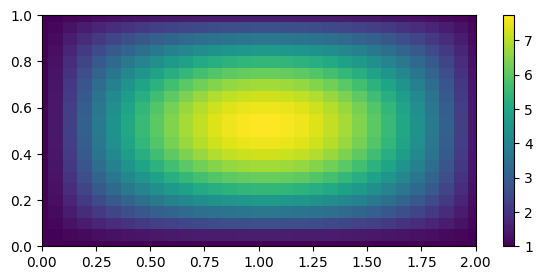

PyObject <matplotlib.colorbar.Colorbar object at 0x7f1ce5e2ecd0>

In [19]:
using JFVM

# domain
Lx = 2.0
Ly = 1.0
Nx = 30
Ny = 20
c_left   = 1.0    # [mol/m^3]
c_right  = 1.0    # [mol/m^3]
c_bottom = 1.0    # [mol/m^3]
c_top    = 1.0    # [mol/m^3]
k        = 1.0e-4 # [1/s]
m  = createMesh2D(Nx, Ny, Lx, Ly)

# diffusion coefficient
D_val  = 1e-5                          # [m^2/s]
D_cell = createCellVariable(m, D_val)
D_face = harmonicMean(D_cell)
M_diff = diffusionTerm(D_face)

# Boundary conditions
BC             = createBC(m)
BC.left.a[:]   = 0.0
BC.left.b[:]   = 1.0
BC.left.c[:]   = c_left
BC.right.a[:]  = 0.0
BC.right.b[:]  = 1.0
BC.right.c[:]  = c_right
BC.bottom.a[:] = 0.0
BC.bottom.b[:] = 1.0
BC.bottom.c[:] = c_bottom
BC.top.a[:]    = 0.0
BC.top.b[:]    = 1.0
BC.top.c[:]    = c_top
M_bc, RHS_bc   = boundaryConditionTerm(BC)

# linear source term (reaction)
k_cell = createCellVariable(m, k)
M_source  = linearSourceTerm(k_cell) # [mol/m^3/s]

# solve the equation
c = solveLinearPDE(m, -M_source-M_diff+M_bc, RHS_bc)
figure(figsize=(7,3))
visualizeCells(c)
colorbar()

## Transient diffusion equation
The transient diffussion equation,
$$\frac{\partial c}{\partial t} + \nabla. (-D \nabla c) = 0,$$
can be solved in JFVM.jl by discretizing the accumulation term. Right now, only forward difference discretization (Euler) is available. It is not difficult to implement other time stepping methods.

# Advection equation

# Cahn-Hilliard
For more information about this equation, see [its wikipedia page](https://en.wikipedia.org/wiki/Cahn–Hilliard_equation) and [this FiPy solution](https://www.ctcms.nist.gov/fipy/examples/cahnHilliard/generated/examples.cahnHilliard.mesh2D.html) that I have reproduced below in JFVM.jl. 

10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0


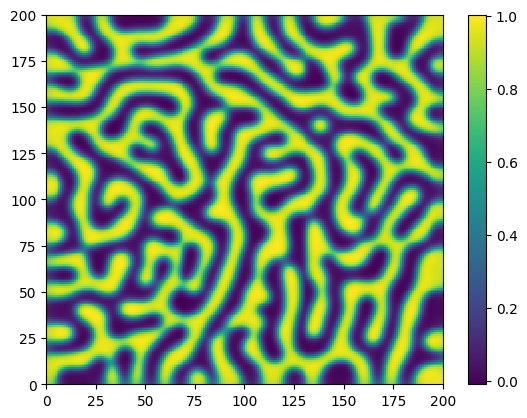

300.0


PyObject <matplotlib.colorbar.Colorbar object at 0x7f9faf289510>

In [24]:
using JFVM, Distributions

nx=200
ny=200
m=createMesh2D(nx, ny, 200.0, 200.0)
BC=createBC(m)
#BC.left.a[:]=0.0 
#BC.left.b[:]=1.0
#BC.left.c[:]=1.0
#BC.right.a[:]=0.0
#BC.right.b[:]=1.0
#BC.right.c[:]=0.0
D=1.0
a=1.0
e=1.0
D_cell=createCellVariable(m, 1.0)
D_face=arithmeticMean(D_cell)
e_cell=createCellVariable(m, 1.0)
e_face  = arithmeticMean(e_cell)
phi_old=createCellVariable(m, rand(Normal(0.5, 0.01), nx,ny))
phi_init=copyCell(phi_old)
phi=copyCell(phi_old)
Mbc, RHSbc=boundaryConditionTerm(BC)
Mdif2=diffusionTerm(D_face)*diffusionTerm(e_face.*e_face)
t_final = 300
t = 0.0
dexp = -5.0
while t<t_final
    dt = 10 #min(100.0, exp(dexp)) # uncomment these lines to get smaller time-step
    # dexp += 0.01
    t += dt
    println(t)
    phi_face=arithmeticMean(phi)
    Mt, RHSt=transientTerm(phi_old, dt)
    Mdif1=diffusionTerm(a^2*D_face.*(1.0-6.0*phi_face.*(1-phi_face)))
    M=Mbc-Mdif1+Mdif2+Mt
    RHS=RHSt+RHSbc
    phi=solveMUMPSLinearPDE(m,M,RHS)
    phi_old=copyCell(phi)
end
visualizeCells(phi)
colorbar()